In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [2]:
sys.path.append('../scripts')

In [3]:
from hypothesis_testing import load_data,calculate_kpis,segment_data,t_test,anova_test,chi_square_test

In [4]:
df = load_data('../data/cleaned_dataset.csv')

c:\Users\Kalea\Desktop\week 3\notebooks\../scripts\hypothesis_testing.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data successfully loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  P

#### calculate kpi like claimrate and profit margin to test the hypothesis

In [8]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'ClaimRate',
       'ProfitMargin'],
      dtype='object')

In [5]:
df= calculate_kpis(df)

KPIs calculated: ClaimRate and ProfitMargin


In [6]:
df[['ClaimRate','ProfitMargin']].describe()

,ClaimRate,ProfitMargin
count,1.000098e+06,1.000098e+06
mean,2.794202e+06,-2.955694e+00
std,3.947653e+08,2.367137e+03
min,-6.354800e+08,-3.928486e+05
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.157687e+00
75%,0.000000e+00,2.192982e+01
max,1.525895e+11,6.528260e+04


#### Group the data by segments 

In [7]:
# Group gender
group_male, group_female= segment_data(df,'Gender','Female','Male')
# Create groups for each province
group_provinces = [df[df['Province'] == province] for province in df['Province'].unique()]  
# Create groups for each Postalcode
group_zipcode = [df[df['PostalCode'] == zipcode] for zipcode in df ['PostalCode'].unique()]


### perform the tests 

#### 1. There are no risk differences across provinces 

In [9]:
# Perform Annova test on the provinces to claimrate 
f_stat, p_value = anova_test(group_provinces, 'ClaimRate')  
print(f"ANOVA Test for Provinces: F-stat = {f_stat:.4f}, p = {p_value:.4f}")

ANOVA Test for Provinces: F-stat = 2.1460, p = 0.0284


#### 2.There are no risk differences between zip codes

In [10]:
# Perform Annova test on the postalCode(ziocode) to claimrate
f_stat, p_value = anova_test(group_zipcode, 'ClaimRate')
print(f"ANOVA Test for zipcode: F-stat = {f_stat:.4f}, p = {p_value:.4f}")

ANOVA Test for zipcode: F-stat = 0.6219, p = 1.0000


#### 3. There are no significant margin (profit) differences between zip codes

In [11]:
# Perform Annova test on the postalCode(ziocode) to PofitMargin
f_stat, p_value = anova_test(group_zipcode, 'ProfitMargin')
print(f"ANOVA Test for zipcode: F-stat = {f_stat:.4f}, p = {p_value:.4f}")

ANOVA Test for zipcode: F-stat = 0.8707, p = 0.9977


#### 4. There are no significant risk differences between Women and Men

In [12]:
# Perform t-test on the gender to claimrate
t_stat_gender, p_value_gender = t_test(group_male, group_female, 'ClaimRate')
print(f"T-Test for Gender: t-stat = {t_stat_gender:.4f}, p = {p_value_gender:.4f}")

T-Test for Gender: t-stat = -1.7481, p = 0.0804


##### further tests on Province and Gender

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
    group1        group2       meandiff    p-adj      lower          upper     reject
-------------------------------------------------------------------------------------
 Eastern Cape    Free State  10648951.1951 0.4344  -4665788.1419  25963690.532  False
 Eastern Cape       Gauteng   3253641.9307 0.9045   -4042176.465 10549460.3264  False
 Eastern Cape KwaZulu-Natal   4231323.2122 0.7346  -3401045.0043 11863691.4287  False
 Eastern Cape       Limpopo    656281.7519    1.0   -9821766.747 11134330.2508  False
 Eastern Cape    Mpumalanga   -165063.2346    1.0  -8989005.9497  8658879.4804  False
 Eastern Cape    North West   1945273.2479 0.9974  -5793321.4091  9683867.9049  False
 Eastern Cape Northern Cape   -333561.2273    1.0 -17198284.0321 16531161.5776  False
 Eastern Cape  Western Cape    530106.3092    1.0  -7098823.2425  8159035.8609  False
   Free State       Gauteng  -7395309.2643 0.7657 -211

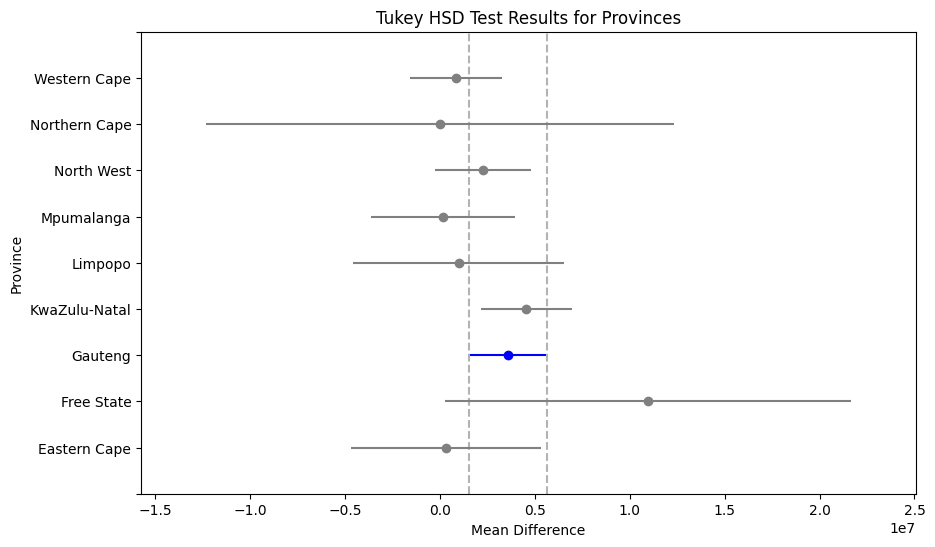

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's test on ClaimRate grouped by Province
tukey = pairwise_tukeyhsd(
    endog=df['ClaimRate'],  # Metric of interest
    groups=df['Province'],  # Grouping variable
    alpha=0.05              # Significance level
)

# Display the results
print(tukey)

# Visualize the results
tukey.plot_simultaneous(comparison_name='Gauteng', xlabel='Mean Difference', ylabel='Province')
plt.title('Tukey HSD Test Results for Provinces')
plt.show()

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1     group2      meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------------
Female          Male 3152257.9616 0.8163 -9018544.8301 15323060.7533  False
Female Not specified 2363649.4159  0.877 -8988088.8527 13715387.6845  False
  Male Not specified -788608.5457 0.9146  -5382451.367  3805234.2755  False
---------------------------------------------------------------------------


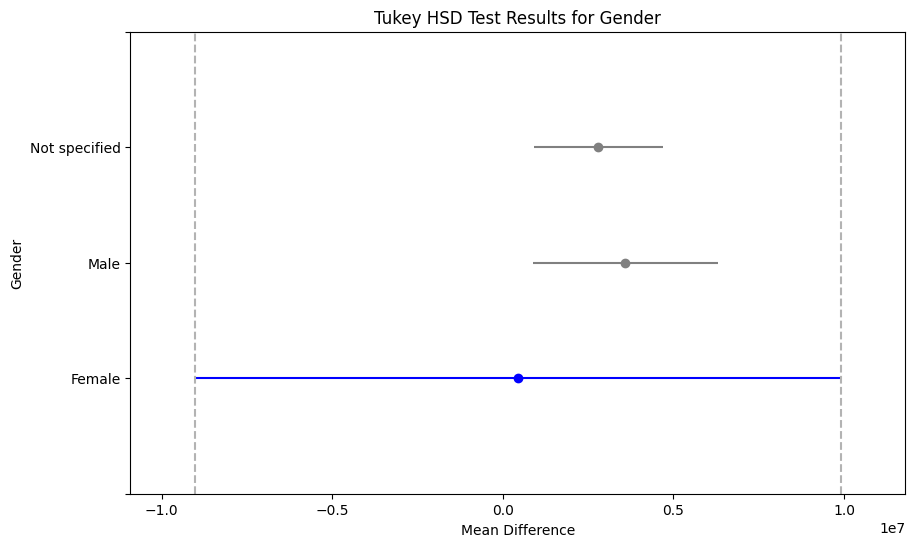

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's test on ClaimRate grouped by Gender
tukey = pairwise_tukeyhsd(
    endog=df['ClaimRate'],  # Metric of interest
    groups=df['Gender'],  # Grouping variable
    alpha=0.05              # Significance level
)

# Display the results
print(tukey)

# Visualize the results
tukey.plot_simultaneous(comparison_name='Female', xlabel='Mean Difference', ylabel='Gender')
plt.title('Tukey HSD Test Results for Gender')
plt.show()

#### visualizations

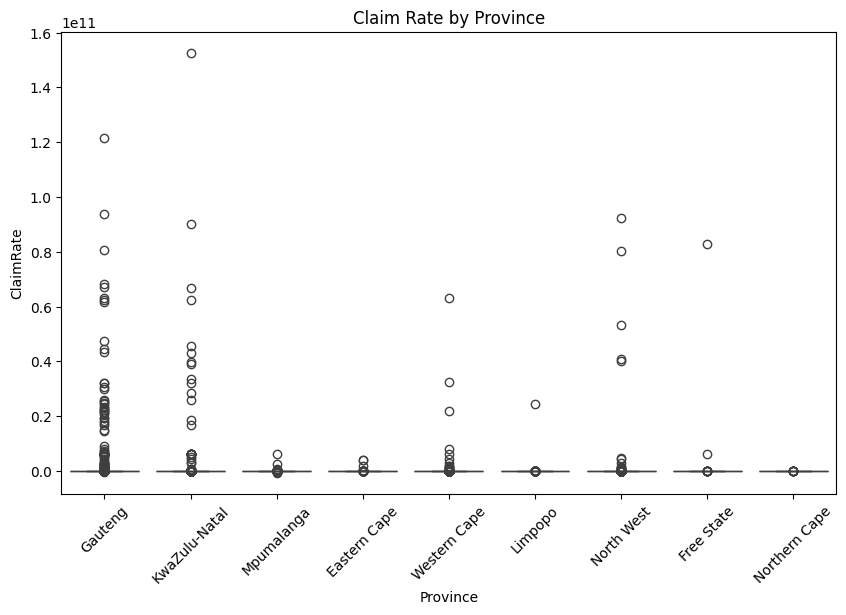

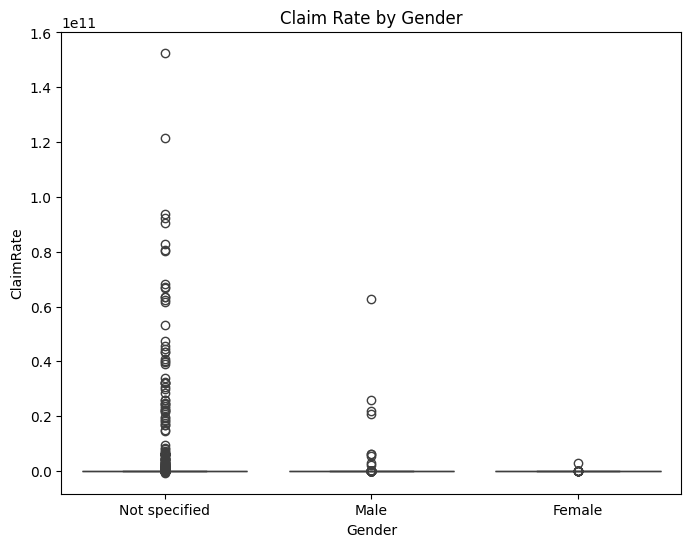

In [19]:
# Claim Rate by Province
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Province', y='ClaimRate')
plt.title('Claim Rate by Province')
plt.xticks(rotation=45)
plt.show()

# Claim Rate by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='ClaimRate')
plt.title('Claim Rate by Gender')
plt.show()

# A/B Hypothesis Testing Summary

## Hypotheses and Results

### 1. Risk Differences Across Provinces
- **ANOVA**: p = 0.0284
- **Post-hoc (Tukey’s)**: No significant pairwise differences.
- **Conclusion**: No practical differences in risk across provinces.

---

### 2. Risk Differences Across Zip Codes
- **ANOVA (ClaimRate)**: p = 1.0000
- **Conclusion**: No significant differences in risk metrics between zip codes.

---

### 3. Profit Margin Differences Across Zip Codes
- **ANOVA (ProfitMargin)**: p = 0.9977
- **Conclusion**: No significant differences in profitability between zip codes.

---

### 4. Risk Differences Between Genders
- **T-Test**: p = 0.0804
- **Post-hoc (Tukey’s)**: No significant differences.
- **Conclusion**: No significant gender-based differences in risk.

# Key Insights

- No significant differences were found in risk or profitability across:
  - **Provinces**
  - **Zip Codes**
  - **Gender**

### Conclusion
- Provinces and zip codes can be treated uniformly.